# Trabalho 6 - Transformada de Fourier e realce no domínio da frequência

Faça as seguintes simulações no jupyther notebook e aproveite os recursos disponíveis para explicar os fundamentos e resultados obtidos

### (1) Série de Fourier de função unidimensional

A função triangular, representada pelo gráfico a seguir, é uma função periódica. Esta classe de funções pode ser representa através de uma série de Fourier.

![](../images/GraficoFuncaoTriangular.png)

A série de Fourier que representa esta função é dada pela seguinte equação:

![](../images/triangularFuncao.png)

Varie o número de senóides para apresentar graficamente diferentes aproximações da função triangular.

[Referência](http://www.matematica.pucminas.br/profs/web_fabiano/calculo4/sf.pdf)

### (2) Prova empírica da propriedade translação e mudança de fase

* (2.1) - Crie duas imagens binárias contendo um mesmo objeto geométrico. A diferença entre as imagens é a translação em que o objeto aparece.
* (2.2) - Calcule a o módulo da transformada de Fourier de cada uma das imagens
* (2.3) - Faça a subtração entre estas imagens e a utilize para demostrar a propriedade  
    
    Referência: Gonzalez e Woods Processamento digital de Imagens

### (3) Filtragem de Fourier pegue uma fotografia de sua autoria.

Execute a filtragem passa-baixa de Fourier desta imagem usando os filtros Butterworth e Ideal.

Compare os resultados obtidos em termos dos fundamentos teóricos correspondentes. 

Referência: Gonzalez e Woods Processamento digital de Imagens

### (4) Filtros espaciais aproximados

Utilizando a imagem e o filtro de Butterworth empregados no exercício anterior, obtenha filtros aproximados no domínio espacial de dimensões nxn . Para este valor de n calcule o somatório do erro quadrático da diferença entre os resultados obtidos pelo filtro exato e o aproximado. Repita este procedimento para diferentes valores de n e trace o gráfico n x SSE. Analise e explique os resultados obtidos. 

-------

### Bibliotecas

In [1]:
import numpy as np
import cv2 as cv

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

-------

## (1) Série de Fourier

Uma função periódica pode ser escrita por uma série de Fourier. A seguir mostraremos o resultado de uma série de Fourier, ao variar o número de senóides de sua expansão.

Partiremos da seguinte equação:

$$
\begin{equation}
    f(x) \sim \frac{1}{2} - \frac{4}{\pi^{2}}\sum^{\infty}_{k = 0}\frac{1}{(2k - 1)^{2}}\sin[(2k - 1)\pi x],
\end{equation}
$$

em que variar o número de senóides significa aumentar os termos do somatório.



In [2]:
def plota(img):
    num = len(img)
    fig = plt.figure(figsize = (15, 9))
    grid = plt.GridSpec(1, num, fig)
    
    for i in range(num):
        ax = fig.add_subplot(grid[0, i])
        ax.imshow(img[i], cmap = 'gray')
        ax.set_xticks([])
        ax.set_yticks([])
    
    return fig

In [237]:
def create_fourier_series(x, k):
    fourier_serie = []
    f = 0.5
    for i in range(k):
        f -= (4/np.pi**2) * (np.sin((2 * i - 1) * np.pi * x) / (2 * i - 1)**2)
#         f -= (4/np.pi**2) * (np.sin((2 * i - 1) * x) / (2 * i - 1)**2)
        fourier_serie.append(np.copy(f))
    
    return fourier_serie

In [207]:
x = np.linspace(-5, 5, num = 1001)

In [196]:
x = np.arange(-np.pi, np.pi, 0.0001)

In [238]:
fourier_serie = create_fourier_series(x, 100)

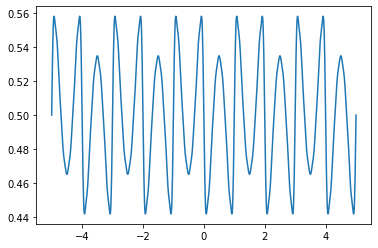

In [239]:
plt.plot(x, fourier_serie[8])

In [247]:
def fourierSeries(n_max,x):
    a0 = 0
    partialSums = a0
    for n in range(1,n_max):
#         try:
        partialSums = partialSums + bn(n)*np.sin(wn(n)*x)
#         except:
#             print("pass")
#             pass

    return partialSums

In [248]:
def bn(n):
    n = int(n)
    if (n%2 != 0):
        return 4/(np.pi*n)
    else:
        return 0

In [249]:
def wn(n):
    global T
    wn = (2*np.pi*n)/T
    return wn

In [250]:
x_ = np.linspace(-20,20,10000)

In [269]:
f = []
T = 8
armonics = 100

In [270]:
for i in x_:
    f.append(fourierSeries(armonics,i))

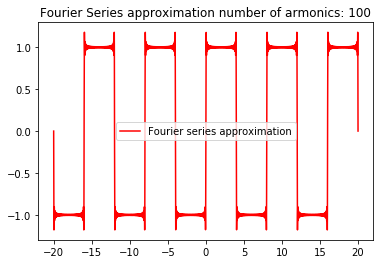

In [271]:
plt.plot(x_, f, color = "red", label = "Fourier series approximation")
plt.title("Fourier Series approximation number of armonics: "+str(armonics))
plt.legend()
plt.show()